# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

# 读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_titianic_train=pd.read_csv("F:/python7数据分析篇/titanic_train.csv")
original_titianic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
original_titianic_test=pd.read_csv("F:/python7数据分析篇/titanic_test.csv")
original_titianic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 评估和清洗数据

从结构和内容进行评估，即整洁度和干净度：结构要求每行是一个观察值，每列是一个变量，每个单元格是一个数字；内容要求：没有缺失值，重复值，无效值
为了方便清洗数据，我们先将两个数据进行复制

In [4]:
cleaned_titianic_train=original_titianic_train.copy()
cleaned_titianic_test=original_titianic_test.copy()

## 数据的整洁度

先查看结构

In [5]:
cleaned_titianic_train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


我们发现其不存在结构性问题，接下来检查`cleaned_titianic_test`

In [6]:
cleaned_titianic_test.head(10)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


也不存在结构性问题

## 数据的干净度

In [7]:
cleaned_titianic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


从输出结果来看，`cleaned_titanic_train`共有891条观察值，其中`Age`、`Cabin`和`Embarked`存在缺失值，将在后续进行评估和清理。

数据类型方面，`PassengerId`表示乘客ID，数据类型不应为数字，应为字符串，所以需要进行数据格式转换。

并且，我们已知`Survived`（是否幸存）、`Pclass`（船舱等级）、`Sex`（性别）、`Embarked`（登船港口）都是分类数据，可以把数据类型都转换为Category。

In [8]:
cleaned_titianic_train['PassengerId']=cleaned_titianic_train['PassengerId'].astype(str)
cleaned_titianic_train['Survived'] = cleaned_titianic_train['Survived'].astype('category')
cleaned_titianic_train['Pclass'] = cleaned_titianic_train['Pclass'].astype('category')
cleaned_titianic_train['Sex'] = cleaned_titianic_train['Sex'].astype('category')
cleaned_titianic_train['Embarked'] = cleaned_titianic_train['Embarked'].astype('category')

In [9]:
cleaned_titianic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


检查`cleaned_titianic_test`数据

In [10]:
cleaned_titianic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


共有418组数据，`Age`,`Fare`,`Cabin`数据存在缺失值，后续需要进行处理
数据类型方面，`PassengerId`表示乘客ID，数据类型不应为数字，应为字符串，所以需要进行数据格式转换。
`Pclass`（船舱等级）、`Sex`（性别）、`Embarked`（登船港口）都是分类数据，可以把数据类型都转换为`Category`。

In [11]:
cleaned_titianic_test['PassengerId']=cleaned_titianic_test['PassengerId'].astype('str')
cleaned_titianic_test['Pclass']=cleaned_titianic_test['Pclass'].astype('category')
cleaned_titianic_test['Sex']=cleaned_titianic_test['Sex'].astype('category')
cleaned_titianic_test['Embarked']=cleaned_titianic_test['Embarked'].astype('category')



In [12]:
cleaned_titianic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    object  
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(3), float64(2), int64(2), object(4)
memory usage: 27.9+ KB


### 处理缺失数据

In [13]:
cleaned_titianic_train[cleaned_titianic_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


有177条观察值的年龄变量缺失，占总体数据比例20%左右。由于这些观察值数量较多，且的其它变量仍然能为分析提供价值，我们最好保留这些行。

但由于我们后面需要用到的逻辑回归函数`Logit`不允许数据中包含缺失值，所以用乘客年龄平均值对缺失值进行填充。

In [14]:
average_age=cleaned_titianic_train['Age'].mean()
cleaned_titianic_train['Age']=cleaned_titianic_train['Age'].fillna(average_age)
cleaned_titianic_train[cleaned_titianic_train['Age'].isnull()]

                                         

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [15]:
cleaned_titianic_train[cleaned_titianic_train['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


有687条观察值的船舱号变量缺失，说明船舱号数据在大部分观察值中都是未知的，所以不能删除这些观察值。

此外，我们认为船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

In [16]:
cleaned_titianic_train[cleaned_titianic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


仅有两条观察值的登船港口变量缺失，但我们认为登船港口并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值

接下来检查`cleaned_titianic_test`的缺失值

In [17]:
cleaned_titianic_test[cleaned_titianic_test["Age"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


为方便后面逻辑回归分析建议对`age`可以取平均值

In [18]:
test_average_age=cleaned_titianic_test['Age'].mean()
cleaned_titianic_test['Age']=cleaned_titianic_test['Age'].fillna(test_average_age)
print(test_average_age)
print(cleaned_titianic_test["Age"].isnull().sum())

30.272590361445783
0


In [19]:
cleaned_titianic_test[cleaned_titianic_test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


我们认为票价金额一班不怎么影响幸存，所以建以保留此数据

In [20]:
cleaned_titianic_test[cleaned_titianic_test["Cabin"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.00000,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


我们认为船舱号一班不怎么影响幸存，所以建以保留此数据

### 处理重复数据

根据数据变量的含义以及内容来看，`PassengerId`是乘客的唯一标识符，不应该存在重复，因此查看是否存在重复值。

In [21]:
print(cleaned_titianic_train['PassengerId'].duplicated().sum())
print(cleaned_titianic_test['PassengerId'].duplicated().sum())

0
0


不存在重复数据

### 处理不一致数据

In [22]:
cleaned_titianic_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [23]:
cleaned_titianic_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [24]:
cleaned_titianic_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [25]:
cleaned_titianic_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

我们发现`cleaned_titianic_train`不存在不一致数据

接下来检查`cleaned_titianic_test`数据

In [26]:
cleaned_titianic_test['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [27]:
cleaned_titianic_test['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [28]:
cleaned_titianic_test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

`cleaned_titianic_test`也不存在不一致数据

### 处理无效或错误数据

In [29]:
cleaned_titianic_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


乘客年龄平均为30岁左右，最大值为80岁，最小值为0.42岁。同乘伴侣/同胞数量最大值为8个，最小为0个。同乘父母/孩子数量最大值为6个，最小值为0个。船票价格平均为32元，最大值为512元，最小值为0元，猜测0元表示增票。数据不存在脱离现实的数值。

In [30]:
cleaned_titianic_test.describe()

,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,417.000000
mean,30.272590,0.447368,0.392344,35.627188
std,12.634534,0.896760,0.981429,55.907576
min,0.170000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,30.272590,0.000000,0.000000,14.454200
75%,35.750000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


`cleaned_titianic_test`也不存在错误或者无效数据

# 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，根据泰坦尼克号乘客的相关信息，预测沉船事件发生后的生还概率。

数据变量包含乘客同乘伴侣/同胞数量，以及同乘父母/孩子数量，这些可以帮助计算出船上家庭成员的数量。我们对同乘家庭成员数量是否会显著影响幸存感兴趣，因此可以创建一个新的变量，记录这一数值

In [31]:
cleaned_titianic_train['FamilyNum']=cleaned_titianic_train['SibSp']+cleaned_titianic_train['Parch']
cleaned_titianic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
cleaned_titianic_test['FamilyNum']=cleaned_titianic_test['SibSp']+cleaned_titianic_test['Parch']
cleaned_titianic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


# 探索数据

在着手逻辑回归分析之前，我们可以先借助数据可视化，探索数值变量的分布，以及与乘客是否幸存存在相关性的变量，为后续的进一步分析提供方向。

In [33]:
# 设置图表色盘为"pastel"
sns.set_palette('pastel')

In [34]:
# 设置图表尺寸
plt.rcParams['figure.figsize']=[7.0,3.5]
plt.rcParams['figure.autolayout']=True

## 幸存比例

([<matplotlib.patches.Wedge at 0x25d1423ca10>,
 [Text(-0.39257494735793463, 1.0275626067091557, '0'),
  Text(0.3925749146953058, -1.0275626191877425, '1')],
 [Text(-0.21413178946796432, 0.5604886945686304, '61.62%'),
  Text(0.21413177165198496, -0.5604887013751322, '38.38%')])

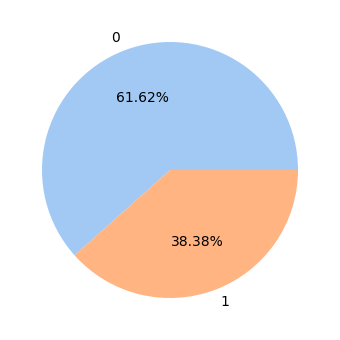

In [35]:
survived_count=cleaned_titianic_train['Survived'].value_counts()
survived_label=survived_count.index
plt.pie(survived_count,labels=survived_label,autopct="%.2f%%")


## 乘客年龄

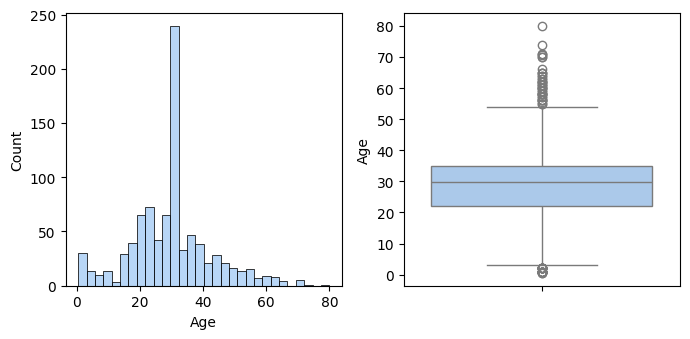

In [36]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_titianic_train,x='Age',ax=axes[0])
sns.boxplot(cleaned_titianic_train,y='Age',ax=axes[1])
plt.show()

大多数乘客年龄位于20岁到40岁之间，但有不少老年乘客以及婴儿。

## 船票金额

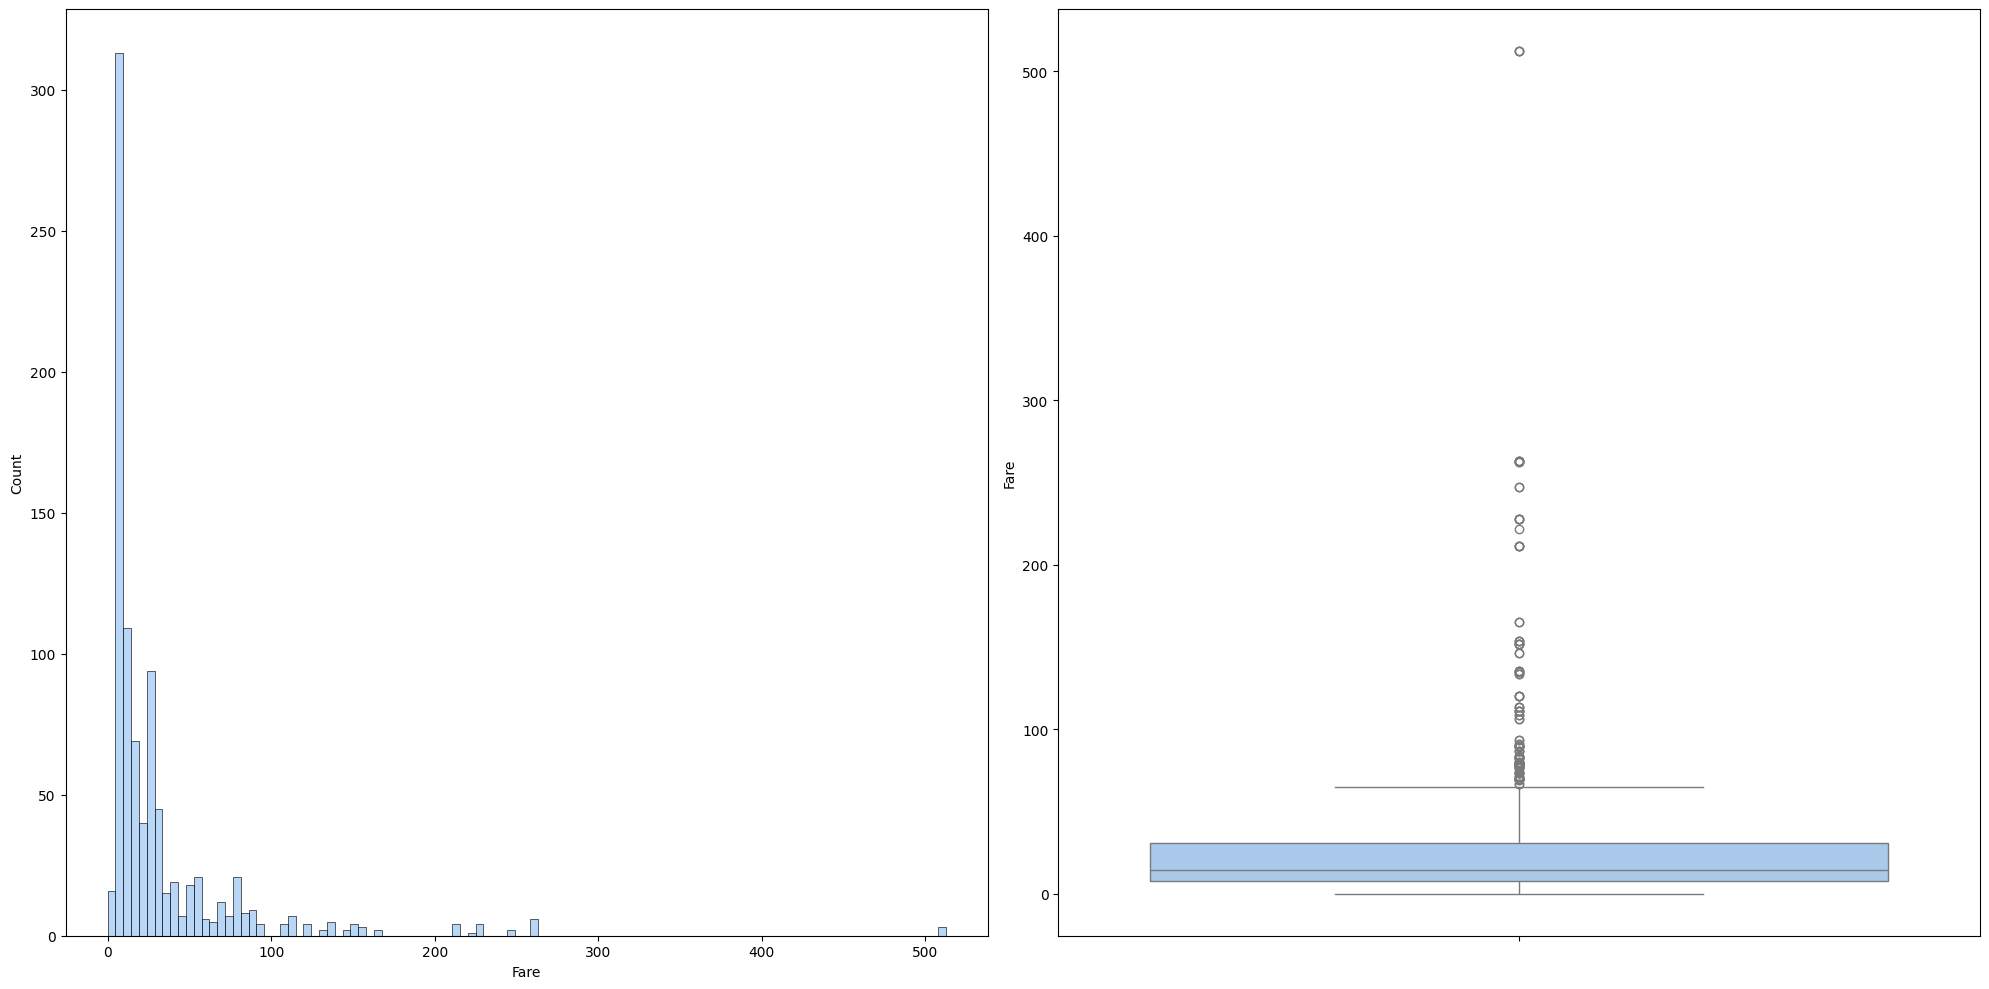

In [37]:
figure,axes=plt.subplots(1,2,figsize=(20,10))
sns.histplot(cleaned_titianic_train,x="Fare",ax=axes[0])
sns.boxplot(cleaned_titianic_train,y="Fare",ax=axes[1])
plt.show()

船票金额大多数是0~100的

## 是否幸存与乘客年龄的关系

<Axes: xlabel='Age', ylabel='Count'>

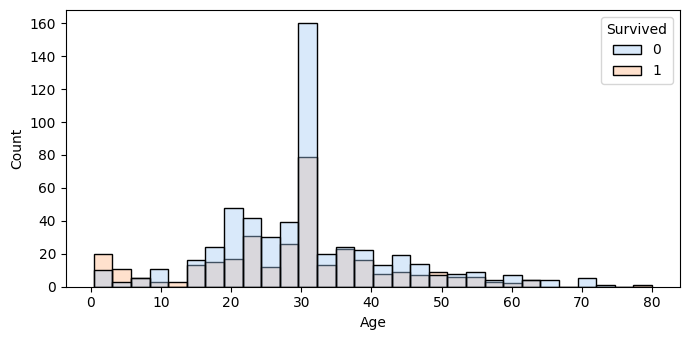

In [38]:
sns.histplot(cleaned_titianic_train,x='Age',hue='Survived',alpha=0.4) #alpha指代透明度

从乘客年龄直方图来看，只有婴儿群体幸存比例较高，绝大部分其余年龄段都是遇难人数多于幸存人数。


## 是否幸存与船票金额的关系

<Axes: xlabel='Fare', ylabel='Count'>

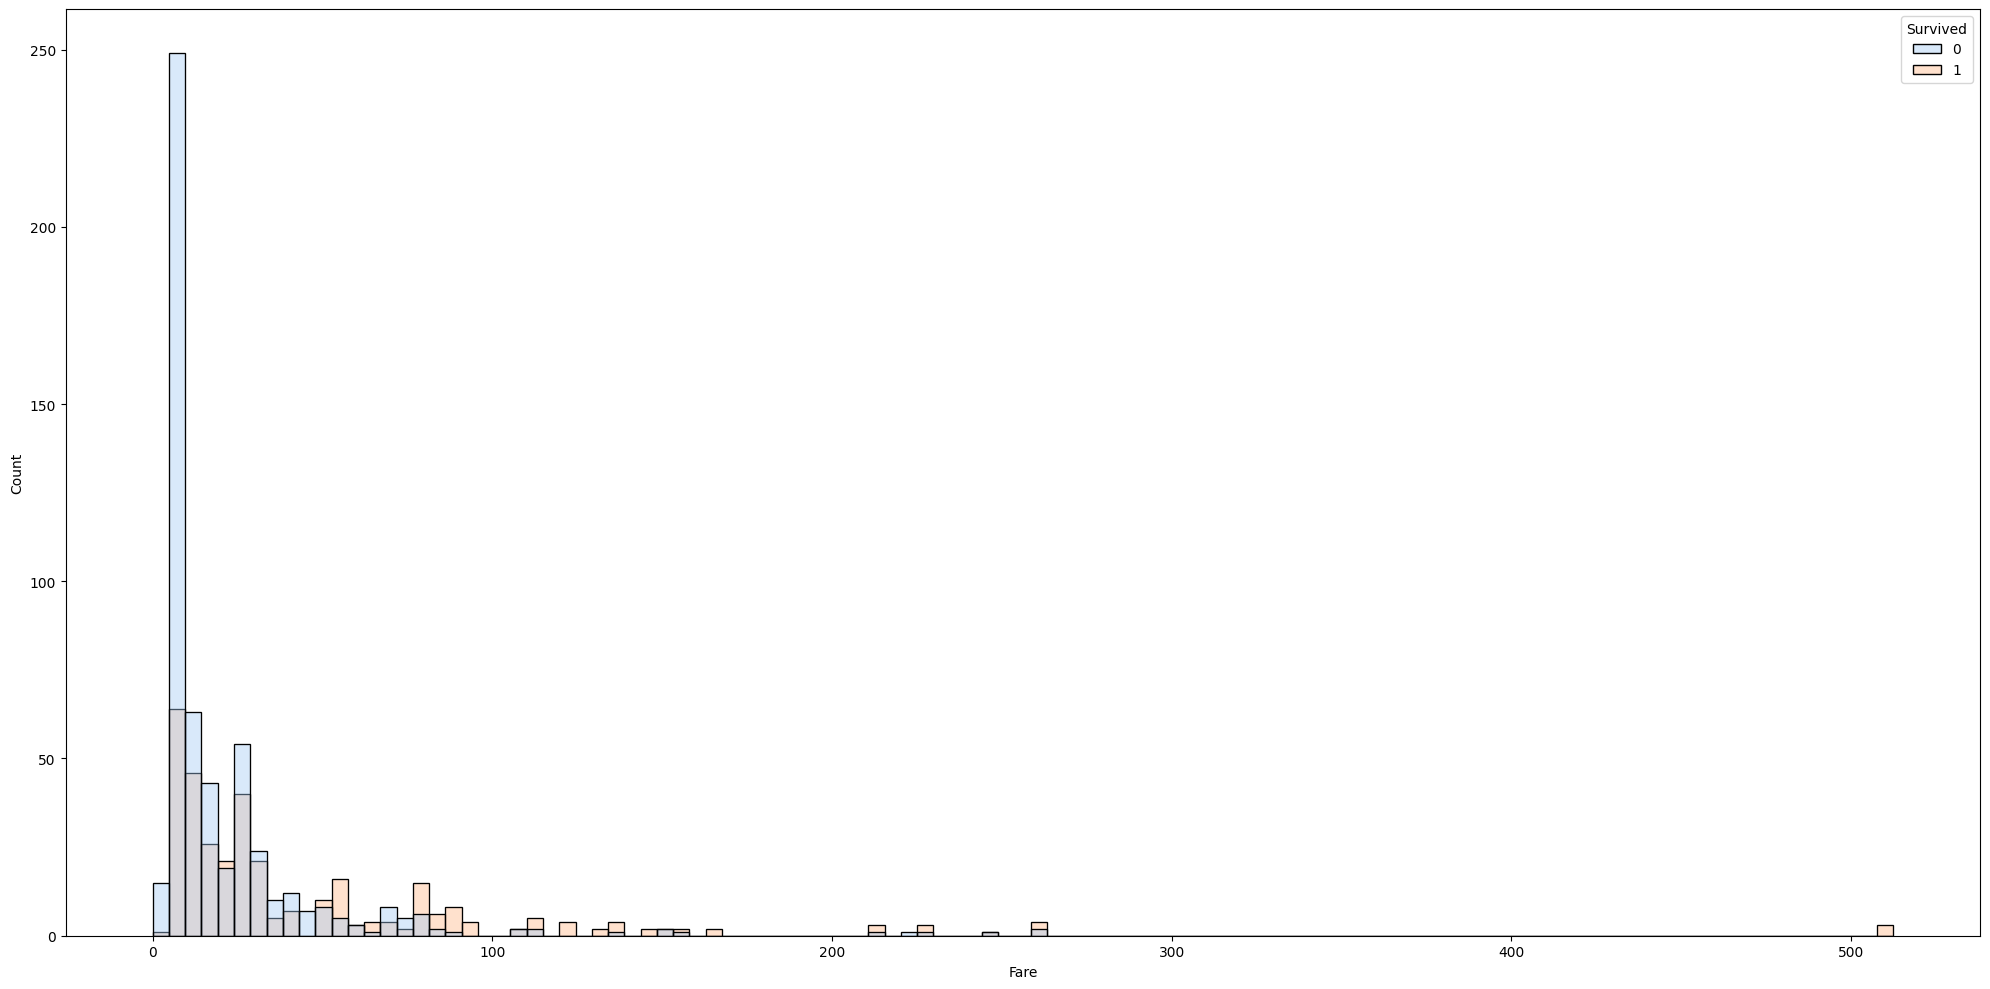

In [39]:
plt.figure(figsize=(20,10))
sns.histplot(cleaned_titianic_train,x='Fare',hue='Survived',alpha=0.4)


能幸存的大概率会是船票贵的

## 是否幸存与船舱等级的关系

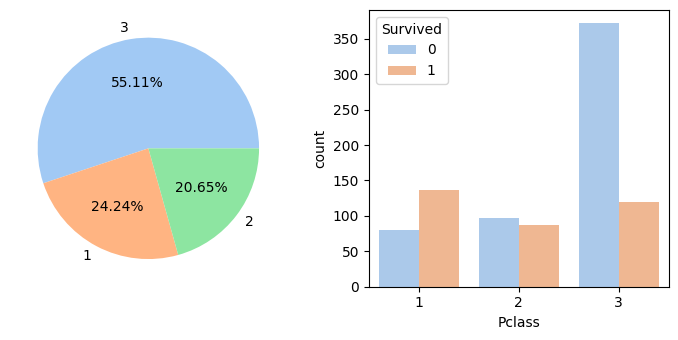

In [40]:
figure,axes=plt.subplots(1,2)
Pclass_count=cleaned_titianic_train['Pclass'].value_counts()
Pclass_label=Pclass_count.index
axes[0].pie(Pclass_count,labels=Pclass_label,autopct='%.2f%%')
sns.countplot(cleaned_titianic_train,x='Pclass',hue='Survived',ax=axes[1])
plt.show()

从是否幸存与船舱等级之间的柱状图来看，船舱等级低的乘客中遇难比例更大，船舱等级高的乘客中幸存比例更大。

## 性别与是否幸存的关系

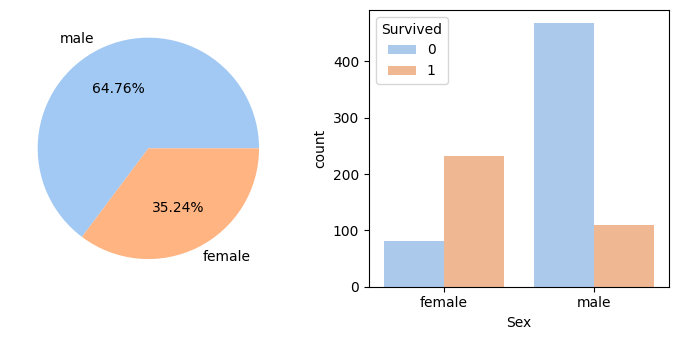

In [41]:
figure,axes=plt.subplots(1,2)
Sex_count=cleaned_titianic_train['Sex'].value_counts()
Sex_label=Sex_count.index
axes[0].pie(Sex_count,labels=Sex_label,autopct='%.2f%%')
sns.countplot(cleaned_titianic_train,x='Sex',hue='Survived')
plt.show()

从是否幸存与性别之间的柱状图来看，男性乘客中遇难比例更大，女性乘客中幸存比例更大。

## 登船港口与是否幸存的关系

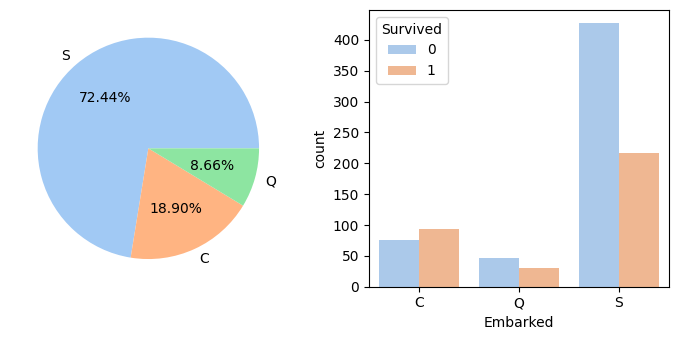

In [42]:
figure,axes=plt.subplots(1,2)
Embarked_count=cleaned_titianic_train['Embarked'].value_counts()
Embarked_label=Embarked_count.index
axes[0].pie(Embarked_count,labels=Embarked_label,autopct='%.2f%%')
sns.countplot(cleaned_titianic_train,x='Embarked',hue='Survived',ax=axes[1])
plt.show()

从是否幸存与登船港口之间的柱状图来看，瑟堡登船的乘客，幸存数量大于遇难数量，而皇后镇和南安普敦则相反

## 家庭成员数量与是否幸存的关系

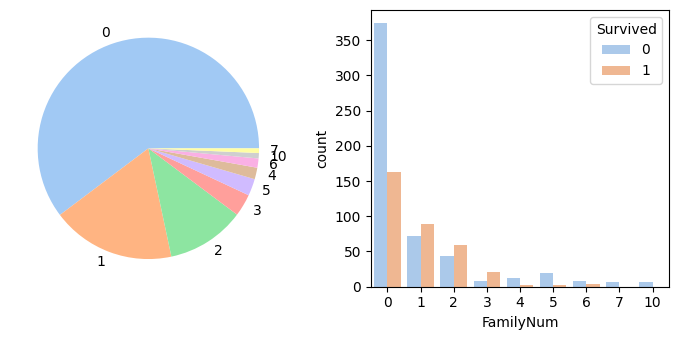

In [43]:
figure,axes = plt.subplots(1, 2)
familyNum_count = cleaned_titianic_train['FamilyNum'].value_counts()
familyNum_label = familyNum_count.index
axes[0].pie(familyNum_count, labels=familyNum_label)
sns.countplot(cleaned_titianic_train, x='FamilyNum', hue='Survived', ax=axes[1])
plt.show()

从是否幸存与乘客家庭成员之间的柱状图来看，独身的乘客中遇难的多于幸存的。从有携带家庭成员的乘客来看，家庭成员在1～3位之间的幸存人数超过遇难人数，但同乘家庭成员超过3位后，遇难的更多。

# 分析数据

在分析步骤中，我们将利用以上清理后到的数据，进行逻辑回归分析，目标是得到一个可以根据泰坦尼克号乘客各个属性，对沉船事件后幸存情况进行预测的数学模型。

我们先引入做逻辑回归所需的模块。

In [44]:
import statsmodels.api as sm

然后可以创建一个新的DataFramelr_titanic_train，让它作为我们进逻辑性回归分析所用的数据。

和cleaned_titianic_train区分开的原因是，我们在进行回归分析前，还可能需要对数据进行一些准备，比如引入虚拟变量，这些都可以在lr_titianic_train上执行。



In [45]:
lr_titianic_train=cleaned_titianic_train.copy()

In [46]:
lr_titianic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


移除大概率不会影响乘客幸存概率的变量

In [47]:
lr_titianic_train=lr_titianic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
lr_titianic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


数据里还存在分类变量，无法直接建立逻辑回归模型。我们需要引入虚拟变量，也就是用0和1分别表示是否属于该类别。

In [48]:
lr_titianic_train=pd.get_dummies(lr_titianic_train,drop_first=True,columns=['Sex','Pclass'],dtype=int)
lr_titianic_train

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Sex_male,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,1,1,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0
2,1,26.000000,0,0,7.9250,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0
4,0,35.000000,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,1,0
887,1,19.000000,0,0,30.0000,0,0,0,0
888,0,29.699118,1,2,23.4500,3,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0


接下来，我们要把因变量和自变量划分出来。

因变量是Survived变量，因为我们进行逻辑回归的目的，是根据其它可能对乘客生还概率有影响的变量，来预测幸存情况。

In [49]:
y=lr_titianic_train['Survived']

我们可以把除Survived之外的先纳入自变量，但需要查看它们之间的相关性。如果其中有些变量之间相关性很高，会导致共线性。

In [50]:
x=lr_titianic_train.drop(["Survived"],axis=1)

In [51]:
x.corr().abs()>0.8

,Age,SibSp,Parch,Fare,FamilyNum,Sex_male,Pclass_2,Pclass_3
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Sex_male,False,False,False,False,False,True,False,False
Pclass_2,False,False,False,False,False,False,True,False
Pclass_3,False,False,False,False,False,False,False,True


<Axes: >

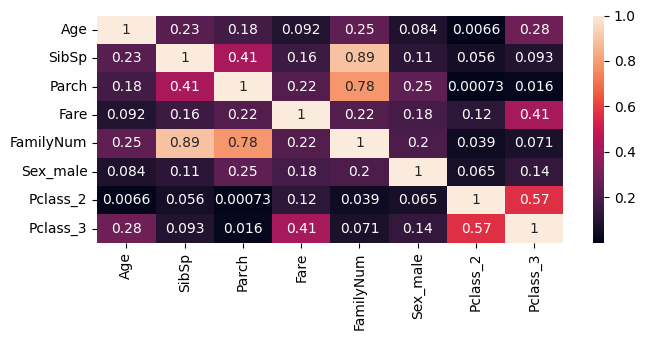

In [52]:
sns.heatmap(x.corr().abs(),annot=True)

从以上输出来看，SibSp和FamilyNum之间的相关系数绝对值大于0.8。这符合预期，因为FamilyNum是根据SibSp和Parch计算出来的。

不同变量之间的如果相关性过高，会导致数值优化算法无法收敛，无法获得逻辑回归模型参数的计算结果，因此我们需要移除FamilyNum或SibSp。我们对同乘家庭成员是否会影响幸存概率感兴趣，所以保留FamilyNum。

此外，如果仔细看相关系数数值，会发现Parch和FamilyNum之间也存在强相关，相关系数为0.78，接近0.8，因此我们也对Parch进行移除，避免算法无法收敛。

In [53]:
x = x.drop(['Parch', 'SibSp'], axis=1)

接下来，给模型的线性方程添加截距。

In [54]:
x=sm.add_constant(x)

下一步就可以调用Logit函数，利用最大似然优化来得到逻辑回归模型的参数值，并输出总结信息。

In [59]:
model=sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Tue, 14 Jan 2025   Pseudo R-squ.:                  0.3339
Time:                        14:14:20   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
==============================================================================
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为船票价格对乘客幸存概率没有显著性影响。因此可以把这个变量移除后，再次建立逻辑回归模型

In [61]:
x=x.drop(["Fare"],axis=1)
model=sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Jan 2025   Pseudo R-squ.:                  0.3323
Time:                        14:15:22   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
==============================================================================
"""

逻辑回归模型预测以下因素的增加（或存在）会降低幸存概率：年龄、同乘家庭成员数、不在一等舱、性别为男性。
要理解各个各个自变量系数的实际含义，我们需要计算自然常数的次方。

In [67]:
# Age
np.exp(-0.0395)

np.float64(0.9612699539905982)

以上结果说明，年龄每增加1岁，生还概率降低4%左右

In [68]:
#Familynum
np.exp(-0.2186)

np.float64(0.803643111115195)

以上结果说明，每多一名同乘家庭成员，生还概率降低20%左右。

In [69]:
#sex_male
np.exp(-2.7854)

np.float64(0.061704402333015156)

以上结果说明，每多一名同乘家庭成员，生还概率降低20%左右。

In [70]:
#Pclass2
np.exp(--1.1798)

np.float64(3.253723393132238)

以上结果说明，二等舱乘客的生还概率比一等舱乘客低71%左右

In [71]:
# Pclass_3
np.exp(-2.3458)

np.float64(0.09577055503172162)

以上结果说明，三等舱乘客的生还概率比一等舱乘客低90%左右。

根据模型参数值，我们总结：

年龄小的乘客幸存概率更高；
女性乘客的生还率比男性乘客的幸存概率更高；
来自的船舱等级高的乘客幸存概率更高；
同乘家庭成员少的乘客幸存概率更高。

前两条背后的原因可能与泰坦尼克号沉船后逃生时，“让孩子和女性先走”的原则。第三条说明可能当时舱位更尊贵的乘客拥有了优先逃生的机会。第四条可能是因为拥有较大数量家庭成员的乘客在灾难发生时会急于解救其他家庭成员而非选择逃生，最后也失去了自己逃生的机会。

得到模型后，我们将用于预测`titianic_test.csv`里泰坦尼克号乘客的生还情况。

下一步是给模型中的分类变量引入虚拟变量，但在引入前我们需要先把分类变量的类型转换为Category，并且通过categories参数，让程序知道所有可能的分类值。这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。



In [76]:
cleaned_titianic_test["Pclass"]=pd.Categorical(cleaned_titianic_test["Pclass"],categories=["1","2","3"])
cleaned_titianic_test['Sex'] = pd.Categorical(cleaned_titianic_test['Sex'], categories=['female', 'male'])
cleaned_titianic_test['Embarked'] = pd.Categorical(cleaned_titianic_test['Embarked'], categories=['C', 'Q', 'S'])

下一步，给模型用到的分类变量引入虚拟变量

cleaned_titianic_test=pd.get_dummies(cleaned_titianic_test,drop_first=True,columns=['Pclass', 'Sex'],dtype=int)
cleaned_titianic_test

查看一下模型需要的输入变量。

In [78]:
models.params

const        3.809662
Age         -0.038822
Fare         0.003218
FamilyNum   -0.243029
Sex_male    -2.775928
Pclass_2    -1.000345
Pclass_3    -2.132429
dtype: float64

接下来构建我们要输入给模型进行预测的变量，需要和模型训练时的输入一致。

In [79]:
x_test = cleaned_titianic_test[['Age', 'FamilyNum', 'Pclass_2', 'Pclass_3', 'Sex_male']]
x_test = sm.add_constant(x_test)

现在就可以调用逻辑回归模型的predict方法，获得预测的幸存概率。

In [80]:
predict_value=model.predict(x_test)
predict_value

0      0.587485
1      0.879434
2      0.324638
3      0.656963
4      0.940242
         ...   
413    0.627274
414    0.925647
415    0.548744
416    0.627274
417    0.520809
Length: 418, dtype: float64

In [81]:
predict_value>0.5

0       True
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415     True
416     True
417     True
Length: 418, dtype: bool

我们发现预测的逃生者生还de